# **CREDIT CARD FRAUD DETECTION WITH NEURAL NETWORKS**

*Deborah Maffezzoni and Francesca Riondato*

In [1]:
# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# 1. Dataset Information



We decide to propose a **Credit Card Fraud Detection** analysis using machine learning techniques, with a primary focus on *deep learning* models. The dataset used for the project has been taken from *kaggle.com* at the following link:
<https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud>.

*Credit card fraud* is a serious concern, which involves unauthorized individuals exploiting someone else's credit card or account information for unauthorized purchases or cash advances.
Recognizing the effectiveness of *Neural Networks* in capturing intricate patterns and anomalies within extensive datasets, we have chosen to deploy Artificial Neural Networks (**ANNs**) and Convolutional Neural Networks (**CNNs**) to identify and prevent instances of fraudulent transactions.


In [2]:
# Load Data
df = pd.read_csv('creditcard.csv')

# Rearrange Columns
df = df[['Time', 'Amount', 'Class'] + [col for col in df.columns if col not in ['Time', 'Amount', 'Class']]]
df.head()

Time  Amount  Class        V1        V2        V3        V4        V5  \
0   0.0  149.62      0 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1   0.0    2.69      0  1.191857  0.266151  0.166480  0.448154  0.060018   
2   1.0  378.66      0 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3   1.0  123.50      0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4   2.0   69.99      0 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7  ...       V19       V20       V21       V22       V23  \
0  0.462388  0.239599  ...  0.403993  0.251412 -0.018307  0.277838 -0.110474   
1 -0.082361 -0.078803  ... -0.145783 -0.069083 -0.225775 -0.638672  0.101288   
2  1.800499  0.791461  ... -2.261857  0.524980  0.247998  0.771679  0.909412   
3  1.247203  0.237609  ... -1.232622 -0.208038 -0.108300  0.005274 -0.190321   
4  0.095921  0.592941  ...  0.803487  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458  
4  0.141267 -0.206010  0.502292  0.219422  0.215153  

[5 rows x 31 columns]

In [3]:
df.shape

(284807, 31)

The *creditcard* dataset includes 284,807 transactions with 31 variables.

In [4]:
col_names = df.columns

# Display the column names
print(col_names)

Index(['Time', 'Amount', 'Class', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28'],
      dtype='object')


In [5]:
# Numerical Variables
num_var = df.select_dtypes(include=['int', 'float']).columns
print(f'The number of numerical variables is {len(num_var)} out of {len(df.columns)}')

The number of numerical variables is 31 out of 31


In [6]:
# Check Missing Values
df.isnull().values.any()

False

We can observe that the dataset consists of **100%** *numerical*
variables and it does ***not*** present any *missing* values. In particular:

*   the variable **Time** contains the seconds elapsed between each transaction and the first transaction in the dataset.
*   the feature **Amount** contains the value of each transaction.
*   the *binary* variable **Class** represents our ***target***, revealing if a certain transaction was *genuine* (0) or a *fraud* (1).
*   the features **V1, V2, .., V28** are numerical inputs result of a PCA transformation whose content couldn’t be displayed due to their confidential nature.

In [7]:
# Statistical Summary
df.describe().round(2)

Time     Amount      Class         V1         V2         V3  \
count  284807.00  284807.00  284807.00  284807.00  284807.00  284807.00   
mean    94813.86      88.35       0.00       0.00       0.00      -0.00   
std     47488.15     250.12       0.04       1.96       1.65       1.52   
min         0.00       0.00       0.00     -56.41     -72.72     -48.33   
25%     54201.50       5.60       0.00      -0.92      -0.60      -0.89   
50%     84692.00      22.00       0.00       0.02       0.07       0.18   
75%    139320.50      77.16       0.00       1.32       0.80       1.03   
max    172792.00   25691.16       1.00       2.45      22.06       9.38   

              V4         V5         V6         V7  ...        V19        V20  \
count  284807.00  284807.00  284807.00  284807.00  ...  284807.00  284807.00   
mean        0.00       0.00       0.00      -0.00  ...       0.00       0.00   
std         1.42       1.38       1.33       1.24  ...       0.81       0.77   
min        -5.68    -113.74     -26.16     -43.56  ...      -7.21     -54.50   
25%        -0.85      -0.69      -0.77      -0.55  ...      -0.46      -0.21   
50%        -0.02      -0.05      -0.27       0.04  ...       0.00      -0.06   
75%         0.74       0.61       0.40       0.57  ...       0.46       0.13   
max        16.88      34.80      73.30     120.59  ...       5.59      39.42   

             V21        V22        V23        V24        V25        V26  \
count  284807.00  284807.00  284807.00  284807.00  284807.00  284807.00   
mean        0.00      -0.00       0.00       0.00       0.00       0.00   
std         0.73       0.73       0.62       0.61       0.52       0.48   
min       -34.83     -10.93     -44.81      -2.84     -10.30      -2.60   
25%        -0.23      -0.54      -0.16      -0.35      -0.32      -0.33   
50%        -0.03       0.01      -0.01       0.04       0.02      -0.05   
75%         0.19       0.53       0.15       0.44       0.35       0.24   
max        27.20      10.50      22.53       4.58       7.52       3.52   

             V27        V28  
count  284807.00  284807.00  
mean       -0.00      -0.00  
std         0.40       0.33  
min       -22.57     -15.43  
25%        -0.07      -0.05  
50%         0.00       0.01  
75%         0.09       0.08  
max        31.61      33.85  

[8 rows x 31 columns]

Looking at the distribution of the **Amount** data, we can infer that the majority of transactions, specifically 75%, were below €77.16. The dataset includes a transaction with the highest amount recorded at €25,691.16, much higher than the average transaction amount of €88.35.

This wide spread in transaction amounts may be due to the diverse nature of the dataset, ranging from *common* transactions to *occasional* high-value transactions that substantially impact the overall average.

# 2. Exploratory Data Analysis

## *Class*

Let's get ***count*** of genuine and fraudulent transactions:

In [8]:
genuine = df['Class'].value_counts().get(0, 0)            # (Class 0)
fraud = df['Class'].value_counts().get(1, 0)              # (Class 1)

print(f'Count of Fraudulent Transactions: {fraud}')
print(f'Count of Non-Fraudulent Transactions: {genuine}')

Count of Fraudulent Transactions: 492
Count of Non-Fraudulent Transactions: 284315


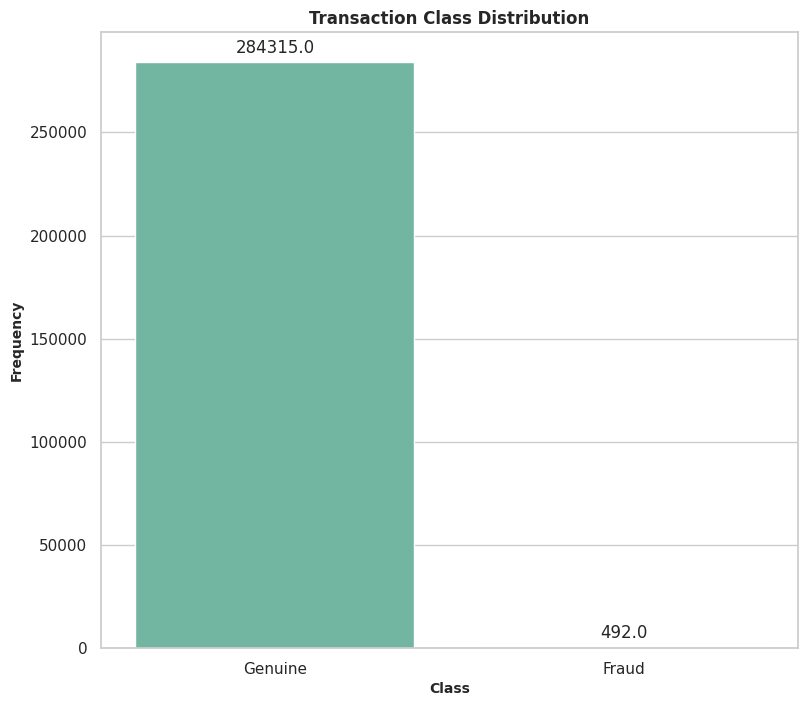

In [9]:
# Barplot of Class Distribution

Labels = ['Genuine', 'Fraud']
count_classes = pd.value_counts(df['Class'], sort=True)

sns.set(style = 'whitegrid')
plt.figure(figsize = (9, 8))
ax = sns.barplot(x = count_classes.index, y = count_classes.values, palette = 'Set2')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Transaction Class Distribution', fontweight = 'bold', fontsize = 12)
plt.xlabel('Class', fontweight = 'bold', fontsize = 10)
plt.ylabel('Frequency', fontweight = 'bold', fontsize = 10)
plt.xticks(range(2), Labels)
plt.show()

Let's compute the ***percentage*** of genuine and fraudulent transactions:

In [10]:
perc_genuine = (genuine / len(df)) * 100
perc_fraud = (fraud / len(df)) * 100

print(f'Percentage of Genuine Transactions: {perc_genuine:.2f}%')
print(f'Percentage of Fraudulent Transactions: {perc_fraud:.2f}%')

Percentage of Genuine Transactions: 99.83%
Percentage of Fraudulent Transactions: 0.17%


In [11]:
# Pie Chart of Class Distribution
fig = px.pie(df.Class,
             values = df.Class.value_counts(),
             names = ['Genuine', 'Fraud'],
             title = 'Transaction Class Distribution',
             hole = 0.4)

fig.update_layout(title_text = '<b>Transaction Class Distribution</b>',
                  title_x = 0.5,
                  title_y = 0.91,
                  title_font = dict(size = 14, color = 'black'),
                  width = 600,
                  height = 500
                 )

fig.show()

The dataset is highly **imbalanced**, with only **0.173%** of observations being *fraudulent* transactions.

## *Amount*

Let's check the ***amount*** of money involved in each *kind* of transaction:

In [12]:
print('-----------------------AMOUNT-----------------------')
amnt_df = pd.concat([df.query('Class == 0').Amount.describe(), df.query('Class == 1').Amount.describe()], axis=1)
amnt_df.columns = ['Genuine Transactions', 'Fraudulent Transactions']
amnt_df

-----------------------AMOUNT-----------------------


Genuine Transactions  Fraudulent Transactions
count         284315.000000               492.000000
mean              88.291022               122.211321
std              250.105092               256.683288
min                0.000000                 0.000000
25%                5.650000                 1.000000
50%               22.000000                 9.250000
75%               77.050000               105.890000
max            25691.160000              2125.870000

Inspecting the results, we can infer that the 75% of **legitimate** transactions were below €77.05 and the highest genuine amount was €25,691.16, much higher than the average amount of €88.29. In contrast, **fraudulent** transactions had 75% of their values below €105.89 and the maximum illegitimate transaction amount was €2,125.87, considerably higher than the average fraudulent transaction amount of €122.21.

In [13]:
# Distribution of Genuine Amount
fig = px.scatter(df.query('Class == 0'),
                 x = 'Amount', y = df.query('Class == 0').index,
                 title = '<b>Distribution of Genuine Amounts</b>'
                 )

fig.update_layout(xaxis_title = 'Transaction Amount (in €)',
                  yaxis_title = 'Transactions (index)'
                  )

fig.show()

In [14]:
# Distribution of Fraud Amount
fig = px.scatter(df.query('Class == 1'),
                 x = 'Amount', y = df.query('Class == 1').index,
                 title = '<b>Distribution of Fraudulent Amounts</b>'
                 )

fig.update_layout(xaxis_title = 'Transaction Amount (in €)',
                  yaxis_title ='Transactions (index)'
                  )

fig.show()

## *Time*

Let's check which kind of transactions occur ***more*** *often* in a certain time frame:

In [15]:
print('------------------------TIME------------------------')
time_df = pd.concat([df.query('Class == 0').Time.describe(), df.query('Class == 1').Time.describe()], axis=1)
time_df.columns = ['Genuine Transactions', 'Fraudulent Transactions']
time_df

------------------------TIME------------------------


Genuine Transactions  Fraudulent Transactions
count         284315.000000               492.000000
mean           94838.202258             80746.806911
std            47484.015786             47835.365138
min                0.000000               406.000000
25%            54230.000000             41241.500000
50%            84711.000000             75568.500000
75%           139333.000000            128483.000000
max           172792.000000            170348.000000

Examining the results, it can be inferred that *genuine* transactions are more **frequent** compared to fraudulent ones. This observation aligns with the common characteristic of credit card transaction datasets, where *legitimate* transactions significantly **outnumber** *fraudulent* ones.

<ipython-input-16-b1e6e1fb99e1>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-16-b1e6e1fb99e1>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




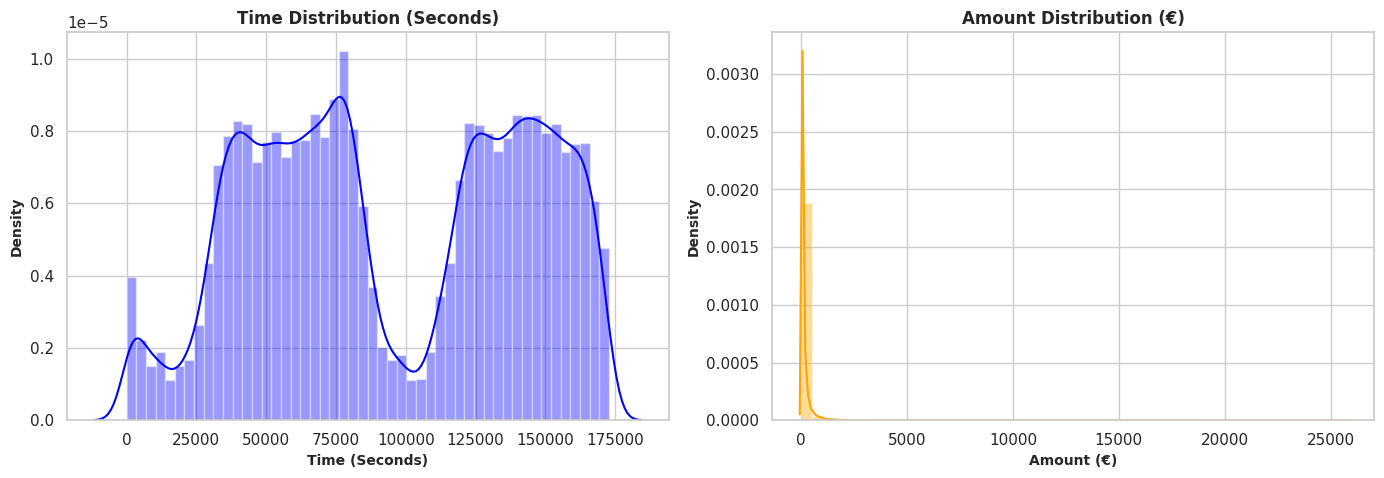

In [16]:
plt.figure(figsize = (14, 9))

# Time Distribution
plt.subplot(2, 2, 1)
sns.distplot(df['Time'], color = 'blue')
plt.title('Time Distribution (Seconds)', fontweight = 'bold', fontsize = 12)
plt.xlabel('Time (Seconds)', fontweight = 'bold', fontsize = 10)
plt.ylabel('Density', fontweight = 'bold', fontsize = 10)

# Amount Distribution
plt.subplot(2, 2, 2)
sns.distplot(df['Amount'], color = 'orange')
plt.title('Amount Distribution (€)', fontweight = 'bold', fontsize = 12)
plt.xlabel('Amount (€)', fontweight = 'bold', fontsize = 10)
plt.ylabel('Density', fontweight = 'bold', fontsize = 10)

plt.tight_layout()
plt.show()

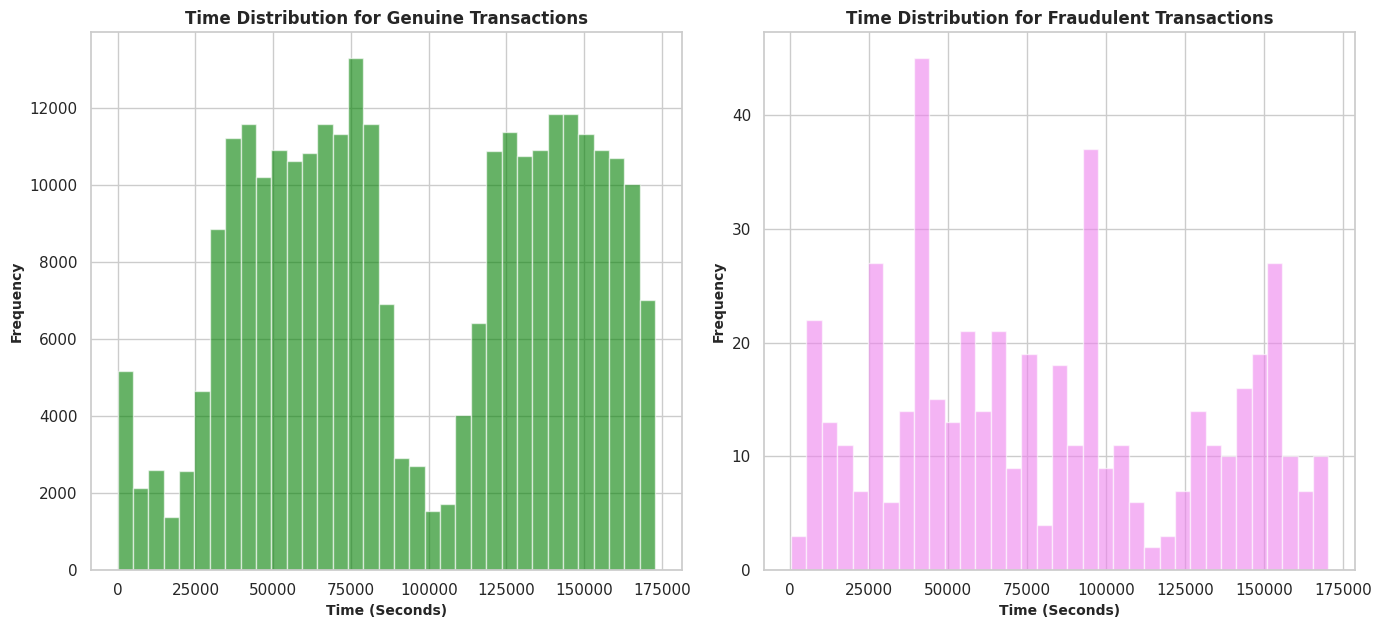

In [17]:
plt.figure(figsize = (14, 12))

# Non-Fraudulent Transactions
plt.subplot(2, 2, 1)
df[df.Class == 0]['Time'].hist(bins = 35, color = 'green', alpha = 0.6)
plt.title('Time Distribution for Genuine Transactions', fontweight = 'bold', fontsize = 12)
plt.xlabel('Time (Seconds)', fontweight = 'bold', fontsize = 10)
plt.ylabel('Frequency', fontweight = 'bold', fontsize = 10)

# Fraudulent Transactions
plt.subplot(2, 2, 2)
df[df.Class == 1]['Time'].hist(bins = 35, color = 'violet', alpha = 0.6)
plt.title('Time Distribution for Fraudulent Transactions', fontweight = 'bold', fontsize = 12)
plt.xlabel('Time (Seconds)', fontweight = 'bold', fontsize = 10)
plt.ylabel('Frequency', fontweight = 'bold', fontsize = 10)

plt.tight_layout()
plt.show()

# 3. Data PreProcessing

Since we are dealing with *binary* classification problems, let's perform **random oversampling** technique to address class *imbalance* within our datasets. The *RandomOverSampler()* method is designed to enhance the **balance** in class distribution by randomly duplicating samples from the *minority* class, which in our case is the *fraud* class. This process continues until a more balanced class distribution is achieved, enhancing the **robustness** of our classification models.

In [18]:
pred = df.loc[:, df.columns != 'Class']
fraud_binary = df.loc[:, 'Class']

# Random Oversampling
oversampling = RandomOverSampler(random_state = 42)
pred_balanced, fraud_binary_balanced = oversampling.fit_resample(pred, fraud_binary)

Once applied random oversampling, let's provide information about the class *distribution* in the ***balanced*** dataset:

In [19]:
print('------------- BALANCED DATA -------------')
print(f'Number of genuine transactions: {sum(fraud_binary_balanced == 0)}')
print(f'Number of fraudulent transactions: {sum(fraud_binary_balanced == 1)}')

------------- BALANCED DATA -------------
Number of genuine transactions: 284315
Number of fraudulent transactions: 284315


In [20]:
# Pie Chart of Class Distribution
fig = px.pie(fraud_binary_balanced,
             values = fraud_binary_balanced.value_counts(),
             names = ['Genuine', 'Fraud'],
             title = 'Transaction Class Distribution',
             hole = 0.4)
fig.update_layout(title_text = '<b>Transaction Class Distribution (Balanced)</b>',
                  title_x = 0.5,
                  title_y = 0.91,
                  title_font = dict(size = 14, color = 'black'),
                  width = 600,
                  height = 500
                 )
fig.show()

To ensure that all features have the same scale, let's **standardize** features by removing the mean and scaling to unit variance:

In [21]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pred_balanced, fraud_binary_balanced, test_size = 0.2, random_state = 42) #80/20 split

# Standardising the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Building Model

## **ANNs**

Artificial Neural Networks (**ANNs**) are a class of machine learning models inspired by the structure and functioning of the *human brain*. ANNs consist of *interconnected* nodes or **neurons** organized into input, hidden and output layers, and connections are represented by *weights* determining their **strength**. Unlike traditional computing architectures, ANNs operate in *parallel*, enabling faster processing and making them adept at providing real-time solutions for complex problems.

Let's define the Artificial Neural Network model composed of the *input* layer with 30 neurons, **one** *hidden* layer with 16 neurons and the *output* layer with 1 neuron:

In [22]:
# Building the Neural Network model

ann = Sequential([
    # Hidden Layer with 16 neurons and ReLU activation
    Dense(16, activation = 'relu', name = 'HiddenLayer'),
    # Output Layer with 1 neuron and sigmoid activation for binary classification
    Dense(1, activation = 'sigmoid', name = 'OutputLayer')
])

### *Training*

In [23]:
# Compiling the Neural Network
ann.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Fitting the model to training data
history_ann = ann.fit(X_train, y_train,
                    epochs = 5,
                    batch_size = 16,  # Batch size for each update
                    validation_data = (X_test, y_test))

Epoch 1/5
28432/28432 [==============================] - 67s 2ms/step - loss: 0.0826 - accuracy: 0.9692 - val_loss: 0.0487 - val_accuracy: 0.9832
Epoch 2/5
28432/28432 [==============================] - 66s 2ms/step - loss: 0.0366 - accuracy: 0.9893 - val_loss: 0.0283 - val_accuracy: 0.9932
Epoch 3/5
28432/28432 [==============================] - 65s 2ms/step - loss: 0.0244 - accuracy: 0.9944 - val_loss: 0.0205 - val_accuracy: 0.9958
Epoch 4/5
28432/28432 [==============================] - 65s 2ms/step - loss: 0.0194 - accuracy: 0.9959 - val_loss: 0.0206 - val_accuracy: 0.9959
Epoch 5/5
28432/28432 [==============================] - 66s 2ms/step - loss: 0.0167 - accuracy: 0.9966 - val_loss: 0.0167 - val_accuracy: 0.9956


In [24]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer (Dense)         (None, 16)                496       
                                                                 
 OutputLayer (Dense)         (None, 1)                 17        
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The number of ***coefficients*** in a neural network is determined by the number of parameters (*weights* and *biases*) in each layer. For a ***dense*** (fully connected) layer, the number of *parameters* is calculated as:

$$ Number Parameters=(Input Size+1)\times Output Size $$

where ***Input*** *Size* represents the number of *neurons* in the input layer, while the ***Output*** *Size* reveals the number of *neurons* in the output layer.


Let's calculate the number of *parameters* for each layer:

In [25]:
parameters_hidden = ann.layers[0].count_params()  # Dense layer
parameters_output = ann.layers[1].count_params()  # Dense layer

# Total number of parameters
total_parameters = sum([parameters_hidden, parameters_output])

print(f'Number of parameters in the Hidden layer: {parameters_hidden}')
print(f'Number of parameters in the Output layer: {parameters_output}')
print('-------------------------------------------------------')
print(f'Total number of parameters in the classifier model: {total_parameters}')

Number of parameters in the Hidden layer: 496
Number of parameters in the Output layer: 17
-------------------------------------------------------
Total number of parameters in the classifier model: 513


Let's show the **architecture** of the Neural Network:

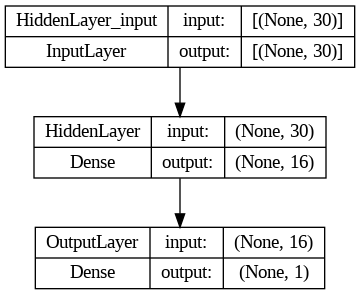

In [26]:
plot_model(ann, show_shapes = True, show_layer_names = True)

In [27]:
# Size of input layer
input_size = X_train.shape[1]
# Size of hidden layer
hidden_layer_size = 16
# Size of output layer
output_size = 1

# Number of coefficients for input layer to hidden layer
coefficients_input_hidden = (input_size + 1) * hidden_layer_size
# Number of coefficients for hidden layer to output layer
coefficients_hidden_output = (hidden_layer_size + 1) * output_size

print(f'Number of coefficients input layer --> hidden layer: {coefficients_input_hidden}')
print(f'Number of coefficients hidden layer --> output layer: {coefficients_hidden_output}')

Number of coefficients input layer --> hidden layer: 496
Number of coefficients hidden layer --> output layer: 17


The following **plot_learning_curve()** function is a valuable tool for assessing the *training* progress of our neural network:

In [28]:
def plot_learning_curve(history):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 5))

    # Convert epochs to integers
    epochs_int = list(map(int, history.epoch))

    # Training & Validation Accuracy values
    axes[0].plot(epochs_int, history.history['accuracy'], label = 'Train', color = 'blue')
    axes[0].plot(epochs_int, history.history['val_accuracy'], label = 'Validation', color = 'orange')
    axes[0].set_title('Training and Validation Accuracy', fontweight = 'bold', fontsize = 12)
    axes[0].set_ylabel('Accuracy', fontweight = 'bold', fontsize = 10)
    axes[0].set_xlabel('Epoch', fontweight = 'bold', fontsize = 10)
    axes[0].legend()
    axes[0].set_xticks(epochs_int)

    # Training & Validation Loss values
    axes[1].plot(epochs_int, history.history['loss'], label = 'Train', color = 'blue')
    axes[1].plot(epochs_int, history.history['val_loss'], label = 'Validation', color = 'orange')
    axes[1].set_title('Training and Validation Loss', fontweight = 'bold', fontsize = 12)
    axes[1].set_ylabel('Loss', fontweight = 'bold', fontsize = 10)
    axes[1].set_xlabel('Epoch', fontweight = 'bold', fontsize = 10)
    axes[1].legend()
    axes[1].set_xticks(epochs_int)

    plt.tight_layout()
    plt.show()

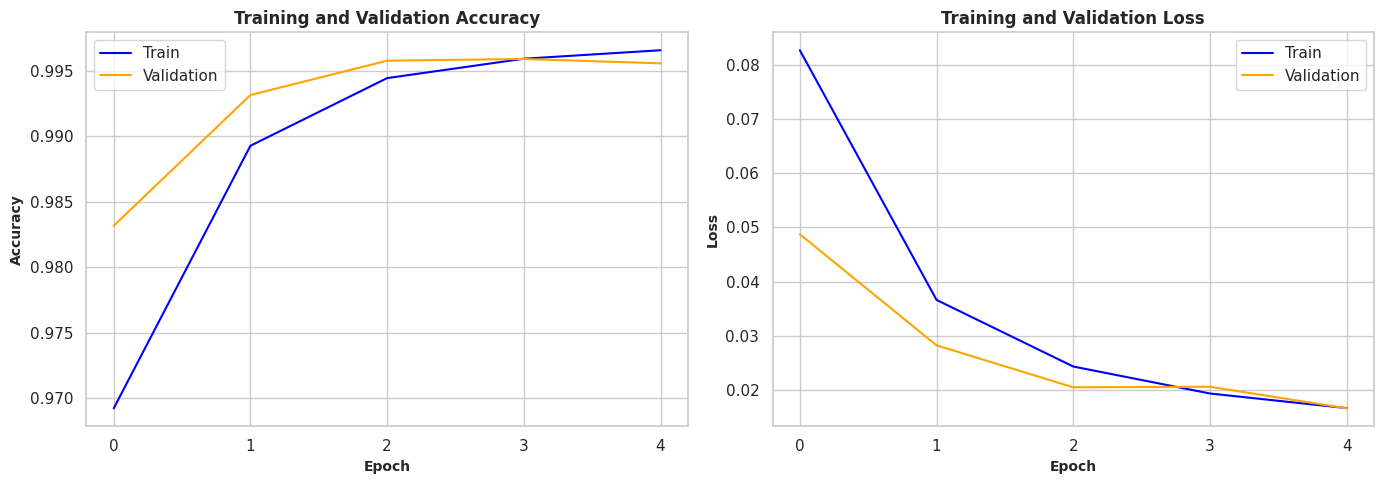

In [29]:
plot_learning_curve(history_ann)

Looking at the **accuracy** plot, we can infer that *both* the training and validation line *increase*, indicating that the model is **learning** and **improving** its predictions. In particular, focusing on the first epochs, the validation accuracy is consistently *higher* than the training accuracy, suggesting that the model is performing better on *unseen* data (validation set) than on the training set.

Examining the **loss** plot, we can confirm that *both* the training and validation line *decrease* over epochs, showing that the model is **improving** in terms of *minimizing* the chosen loss function.

### *Prediction*

The final predicted class is determined by evaluating the predicted probability against three specific **thresholds**: 0.5, 0.8, and 0.9. Therefore,

*   if the predicted probability is *greater* than or *equal* to a threshold X, it will be assigned a class label of **1** (*positive* prediction).
*   if the predicted probability is *less* than threshold X, the instance will be assigned a class label of **0** (*negative* prediction).

In [30]:
y_pred50_ann = (ann.predict(X_test) >= 0.5).astype(int)
y_pred80_ann = (ann.predict(X_test) >= 0.8).astype(int)
y_pred90_ann = (ann.predict(X_test) >= 0.9).astype(int)

3554/3554 [==============================] - 5s 1ms/step


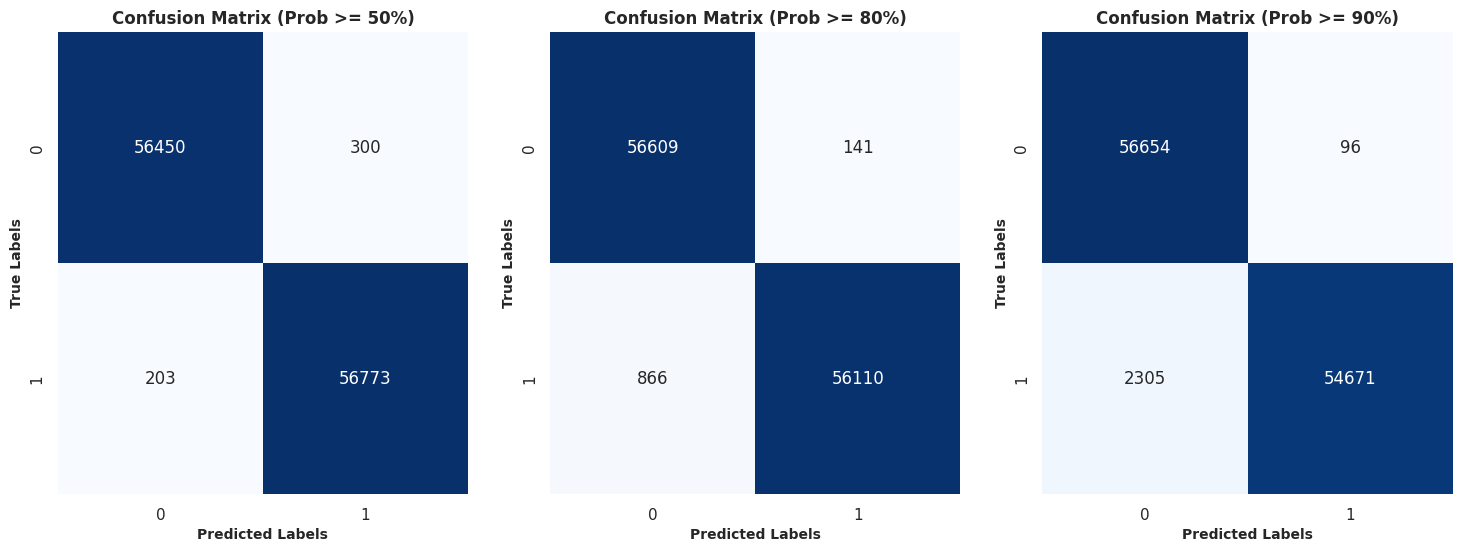

In [31]:
cm50 = confusion_matrix(y_test,y_pred50_ann)
cm80 = confusion_matrix(y_test,y_pred80_ann)
cm90 = confusion_matrix(y_test,y_pred90_ann)

fig, axes = plt.subplots(1, 3, figsize = (18, 6))

# First confusion matrix
sns.heatmap(cm50, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize=10)
axes[0].set_ylabel('True Labels', fontweight='bold', fontsize=10)
axes[0].set_title('Confusion Matrix (Prob >= 50%)', fontweight='bold', fontsize=12)

# Second
sns.heatmap(cm80, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize=10)
axes[1].set_ylabel('True Labels', fontweight='bold', fontsize=10)
axes[1].set_title('Confusion Matrix (Prob >= 80%)', fontweight='bold', fontsize=12)

# Third
sns.heatmap(cm90, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[2])
axes[2].set_xlabel('Predicted Labels', fontweight='bold', fontsize=10)
axes[2].set_ylabel('True Labels', fontweight='bold', fontsize=10)
axes[2].set_title('Confusion Matrix (Prob >= 90%)', fontweight='bold', fontsize=12)

plt.show()

In [32]:
def calculate_metrics(conf_matrix):
    # Percentage of frauds not detected
    perc_fraud_not_detected = (conf_matrix[1, 0] / (conf_matrix[1, 1] + conf_matrix[1, 0])) * 100
    # Percentage of false fraud alarms
    perc_false_alarm = (conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])) * 100

    return round(perc_fraud_not_detected, 2), round(perc_false_alarm, 2)

In [33]:
metrics_data = []

for threshold, conf_matrix in zip(['50%', '80%', '90%'], [cm50, cm80, cm90]):
    fraud_not_detected, false_alarm = calculate_metrics(conf_matrix)

    metrics_data.append({
        'Threshold': threshold,
        'FraudNotDetected': fraud_not_detected,
        'FalseAlarm': false_alarm
    })

print('--------------------ANN--------------------')

metrics_ann = pd.DataFrame(metrics_data)
metrics_ann

--------------------ANN--------------------


Threshold  FraudNotDetected  FalseAlarm
0       50%              0.36        0.53
1       80%              1.52        0.25
2       90%              4.05        0.17

The classifier is performing very well, achieving almost **perfect classification** for both classes in every case.

However, considering that in this scenario correctly classifying fraudulent transactions is crucial, the most appropriate threshold appears to be **50%**, which minimises *sensitivity* (true positive rate) and but especially *specificity* (true negative rate).

In [34]:
y_pred_prob_ann = ann.predict(X_test)

3554/3554 [==============================] - 6s 2ms/step


To show how the true positive rate (*sensitivity*) changes with the false positive rate (*1 - specificity*) at different classification thresholds, let's plot the **ROC curve** of the model:

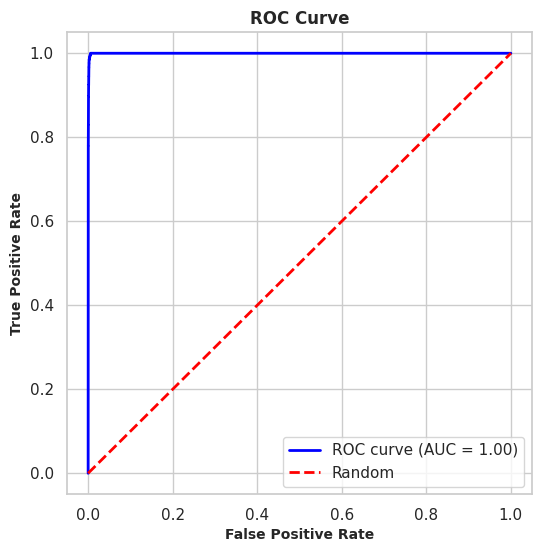

In [35]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_ann)

# Calculate AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 6))
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--', lw = 2, label = 'Random')
plt.xlabel('False Positive Rate', fontweight = 'bold', fontsize = 10)
plt.ylabel('True Positive Rate', fontweight = 'bold', fontsize = 10)
plt.title('ROC Curve', fontweight = 'bold', fontsize = 12)
plt.legend(loc = 'lower right')
plt.show()

The **ROC curve** of our model is positioned toward the *top-left* corner, indicating *high* sensitivity and *low* false positive rate across various thresholds. In other words, the area under the curve (**AUC**) of 1.0 shows that the classifier **perfectly distinguishes** between the two classes (fradulent and genuine transactions), achieving a perfect *sensitivity* while maintaining a perfect *specificity*.

## **CNNs**

Convolutional Neural Networks (**CNNs**) represent a category of deep learning models designed for processing *structured* grid data, particularly effective in tasks such as image and video recognition. The architecture of a CNN is inspired by the *visual* processing mechanisms observed in animals, where **neurons** respond to specific *stimuli* within their receptive field. Their ability to share **weights** through *convolutional* filters allows them to capture translational invariance, making them robust to spatial variations in input data.


To build an appropriate Convolutional Neural Network (CNN) model based on our dataset, we need to ***reshape*** *input* data to have a 3D structure (width, height, channels):

In [36]:
# Reshape the input data to have a 3D structure (width, height, channels=1)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Let's define the Convolutional Neural Network model composed of **two** *convolutional* layers with 32 and 64 neurons, and **one** *output* layer with 1 neuron. To *normalize* the activations and prevent *overfitting*, let's apply after each convolutional layer the **Batch** normalization and the **Dropout** regularization.
Dropout is used for regularization to prevent overfitting.

In [37]:
# Building the CNN model
cnn = Sequential()

# First Convolutional Layer with 32 neurons and ReLu activation
cnn.add(Conv1D(32, 2, activation = 'relu', input_shape=X_train_cnn.shape[1:]))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))
# Second Convolutional Layer with 64 neurons and ReLu activation
cnn.add(Conv1D(64, 2, activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
# Flatten the output to connect to a Dense layer
cnn.add(Flatten())
# Dense (Fully Connected) Layer with 64 neurons and ReLu activation
cnn.add(Dense(64, activation = 'relu'))
cnn.add(Dropout(0.5))  # Dropout for regularization
# Output Layer with 1 neuron and sigmoid activation for binary classification
cnn.add(Dense(1, activation = 'sigmoid'))

### *Training*

In [38]:
# Compile the model
cnn.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Fit the model to training data
history_cnn = cnn.fit(X_train_cnn, y_train,
                    epochs = 5,
                    batch_size = 16,  # Batch size for each update
                    validation_data = (X_test_cnn, y_test))

Epoch 1/5
28432/28432 [==============================] - 221s 8ms/step - loss: 0.0723 - accuracy: 0.9744 - val_loss: 0.0216 - val_accuracy: 0.9950
Epoch 2/5
28432/28432 [==============================] - 211s 7ms/step - loss: 0.0394 - accuracy: 0.9867 - val_loss: 0.0143 - val_accuracy: 0.9970
Epoch 3/5
28432/28432 [==============================] - 213s 8ms/step - loss: 0.0322 - accuracy: 0.9892 - val_loss: 0.0214 - val_accuracy: 0.9946
Epoch 4/5
28432/28432 [==============================] - 216s 8ms/step - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.0185 - val_accuracy: 0.9950
Epoch 5/5
28432/28432 [==============================] - 220s 8ms/step - loss: 0.0274 - accuracy: 0.9908 - val_loss: 0.0138 - val_accuracy: 0.9963


In [39]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 29, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)           

Since the convolutional layers introduce *additional* parameters compared to a densely connected layer, let's compute the number of ***coefficients*** in our convolutional neural network:

In [40]:
parameters_conv1 = cnn.layers[0].count_params()    # Conv1D layer
parameters_conv2 = cnn.layers[3].count_params()    # Conv1D layer
parameters_dense1 = cnn.layers[6].count_params()   # Dense layer
parameters_output = cnn.layers[9].count_params()   # Dense layer

# Total number of parameters
total_parameters = sum([parameters_conv1, parameters_conv2, parameters_dense1, parameters_output])

print(f'Number of parameters in the first Conv1D layer: {parameters_conv1}')
print(f'Number of parameters in the second Conv1D layer: {parameters_conv2}')
print(f'Number of parameters in the Dense layer: {parameters_dense1}')
print(f'Number of parameters in the Output Dense layer: {parameters_output}')
print('--------------------------------------------------------')
print(f'Total number of parameters in the considered layers: {total_parameters}')

Number of parameters in the first Conv1D layer: 96
Number of parameters in the second Conv1D layer: 4160
Number of parameters in the Dense layer: 0
Number of parameters in the Output Dense layer: 65
--------------------------------------------------------
Total number of parameters in the considered layers: 4321


Let's show the **architecture** of the Convolutional Neural Network:

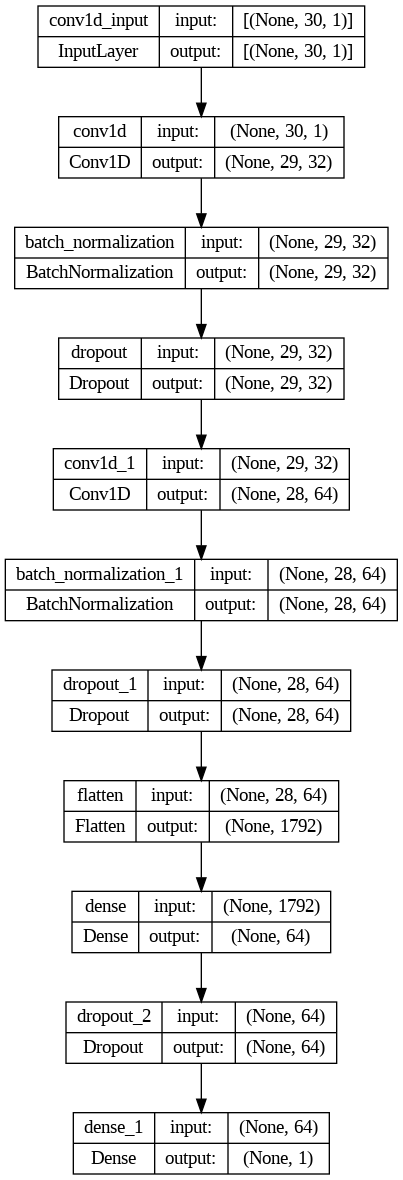

In [41]:
plot_model(cnn, show_shapes = True, show_layer_names = True)

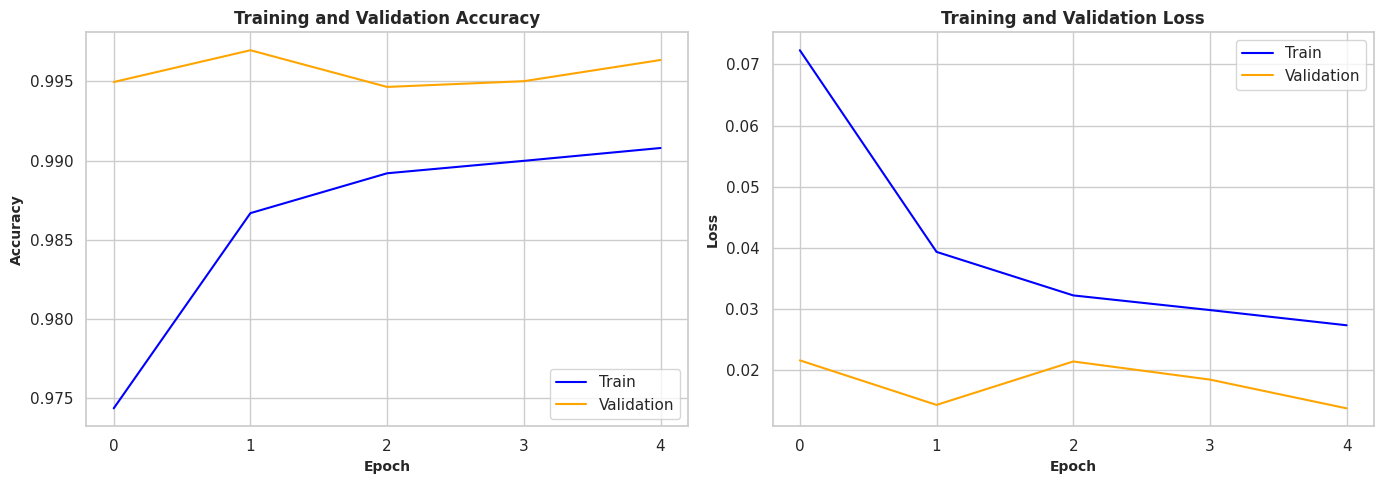

In [42]:
plot_learning_curve(history_cnn)

Looking at the **accuracy** plot, we can infer that the training line *increases* while the validation line seems to be pretty *constant*, indicating that the model is **learning** and **improving** its predictions. In particular, focusing on the first epochs, the validation accuracy is consistently *higher* than the training accuracy, suggesting that the model is performing better on *unseen* data (validation set) than on the training set.

As in the previous case, examining the **loss** plot, we can confirm that *both* the training and validation line *decrease* over epochs, showing that the model is **improving** in terms of *minimizing* the chosen loss function.

### *Prediction*

As we performed earlier, the final predicted class is determined by evaluating the predicted probability against three specific **thresholds**: 0.5, 0.8, and 0.9. Therefore,

*   if the predicted probability is *greater* than or *equal* to a threshold X, it will be assigned a class label of **1** (*positive* prediction).
*   if the predicted probability is *less* than threshold X, the instance will be assigned a class label of **0** (*negative* prediction).

In [43]:
y_pred50_cnn = (cnn.predict(X_test_cnn) >= 0.5).astype(int)
y_pred80_cnn = (cnn.predict(X_test_cnn) >= 0.8).astype(int)
y_pred90_cnn = (cnn.predict(X_test_cnn) >= 0.9).astype(int)

3554/3554 [==============================] - 9s 2ms/step


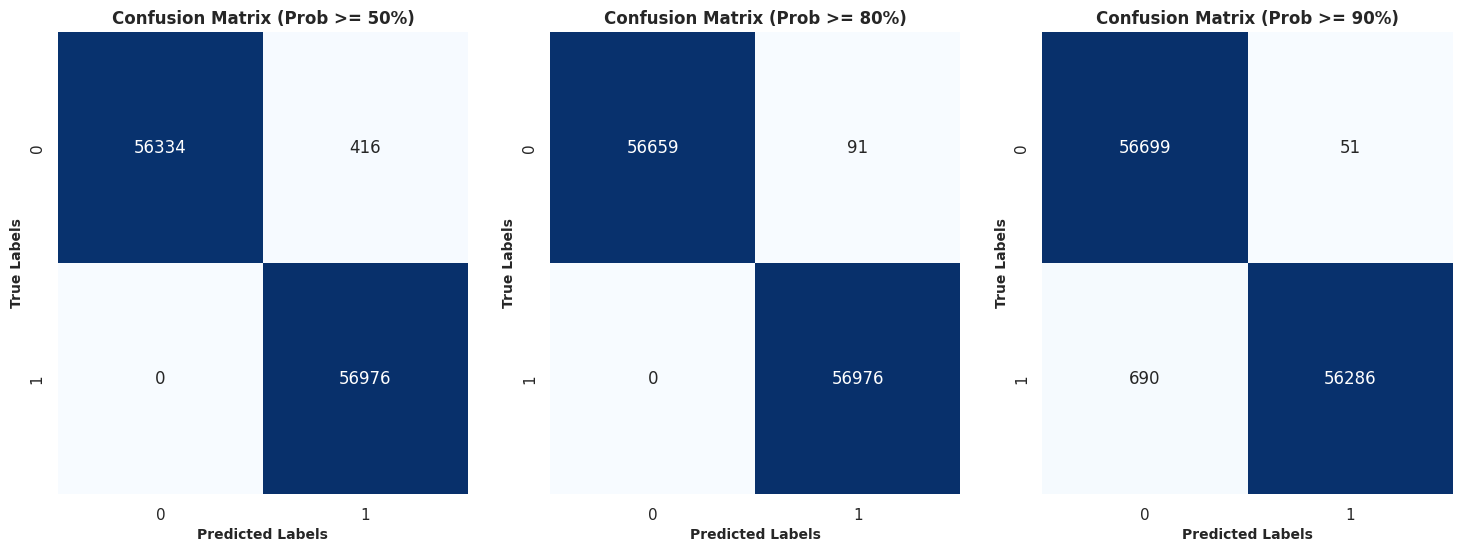

In [44]:
cm50_cnn = confusion_matrix(y_test,y_pred50_cnn)
cm80_cnn = confusion_matrix(y_test,y_pred80_cnn)
cm90_cnn = confusion_matrix(y_test,y_pred90_cnn)

fig, axes = plt.subplots(1, 3, figsize = (18, 6))

# First confusion matrix
sns.heatmap(cm50_cnn, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize=10)
axes[0].set_ylabel('True Labels', fontweight='bold', fontsize=10)
axes[0].set_title('Confusion Matrix (Prob >= 50%)', fontweight='bold', fontsize=12)

# Second
sns.heatmap(cm80_cnn, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize=10)
axes[1].set_ylabel('True Labels', fontweight='bold', fontsize=10)
axes[1].set_title('Confusion Matrix (Prob >= 80%)', fontweight='bold', fontsize=12)

# Third
sns.heatmap(cm90_cnn, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[2])
axes[2].set_xlabel('Predicted Labels', fontweight='bold', fontsize=10)
axes[2].set_ylabel('True Labels', fontweight='bold', fontsize=10)
axes[2].set_title('Confusion Matrix (Prob >= 90%)', fontweight='bold', fontsize=12)

plt.show()

In [45]:
metrics_data = []

for threshold, conf_matrix in zip(['50%', '80%', '90%'], [cm50_cnn, cm80_cnn, cm90_cnn]):
    fraud_not_detected, false_alarm = calculate_metrics(conf_matrix)

    metrics_data.append({
        'Threshold': threshold,
        'FraudNotDetected': fraud_not_detected,
        'FalseAlarm': false_alarm
    })

print('--------------------CNN--------------------')

metrics_cnn = pd.DataFrame(metrics_data)
metrics_cnn

--------------------CNN--------------------


Threshold  FraudNotDetected  FalseAlarm
0       50%              0.00        0.73
1       80%              0.00        0.16
2       90%              1.21        0.09

The classifier is performing very well, achieving almost **perfect classification** for both classes in every case.

However, also in this case, the most appropriate threshold appears to be **80%**, which minimises *specificity* (true positive rate) and but especially *sensitivity* (true negative rate). Nevertheless, even in this case a *50%* threshold is still considered effective.

In [46]:
y_pred_prob_cnn = cnn.predict(X_test_cnn)

3554/3554 [==============================] - 10s 3ms/step


To show how the true positive rate (*sensitivity*) changes with the false positive rate (*1 - specificity*) at different classification thresholds, let's plot the **ROC curve** of the model:

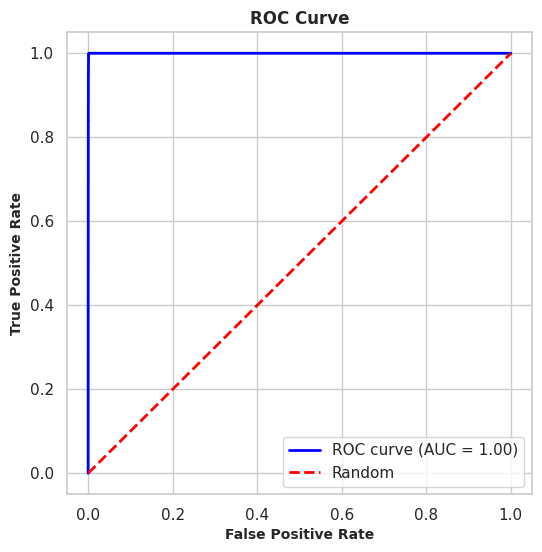

In [47]:
# Compute ROC curve
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_prob_cnn)

# Calculate AUC
roc_auc = auc(fpr2, tpr2)

plt.figure(figsize = (6, 6))
plt.plot(fpr2, tpr2, color = 'blue', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--', lw = 2, label = 'Random')
plt.xlabel('False Positive Rate', fontweight = 'bold', fontsize = 10)
plt.ylabel('True Positive Rate', fontweight = 'bold', fontsize = 10)
plt.title('ROC Curve', fontweight = 'bold', fontsize = 12)
plt.legend(loc = 'lower right')
plt.show()

Also in this case, the **ROC curve** of our model is positioned toward the *top-left* corner, indicating *high* sensitivity and *low* false positive rate across various thresholds. Therefore, the area under the curve (**AUC**) of 1.0 shows that the classifier **perfectly distinguishes** between the two classes (fraudulent and genuine transactions), achieving a perfect *sensitivity* while maintaining a perfect *specificity*.

# 5. Conclusion

To determine the **best** model, let's compare the *average fraud* detection metrics and *false alarm* metrics between an Artificial Neural Network (**ANN**) and a Convolutional Neural Network (**CNN**):

In [48]:
print('--------------------------------------METRICS--------------------------------------')
metrics_df = pd.concat([metrics_ann, metrics_cnn], axis = 1, keys = ['ANN', 'CNN'])
metrics_df

--------------------------------------METRICS--------------------------------------


ANN                                   CNN                            
  Threshold FraudNotDetected FalseAlarm Threshold FraudNotDetected FalseAlarm
0       50%             0.36       0.53       50%             0.00       0.73
1       80%             1.52       0.25       80%             0.00       0.16
2       90%             4.05       0.17       90%             1.21       0.09

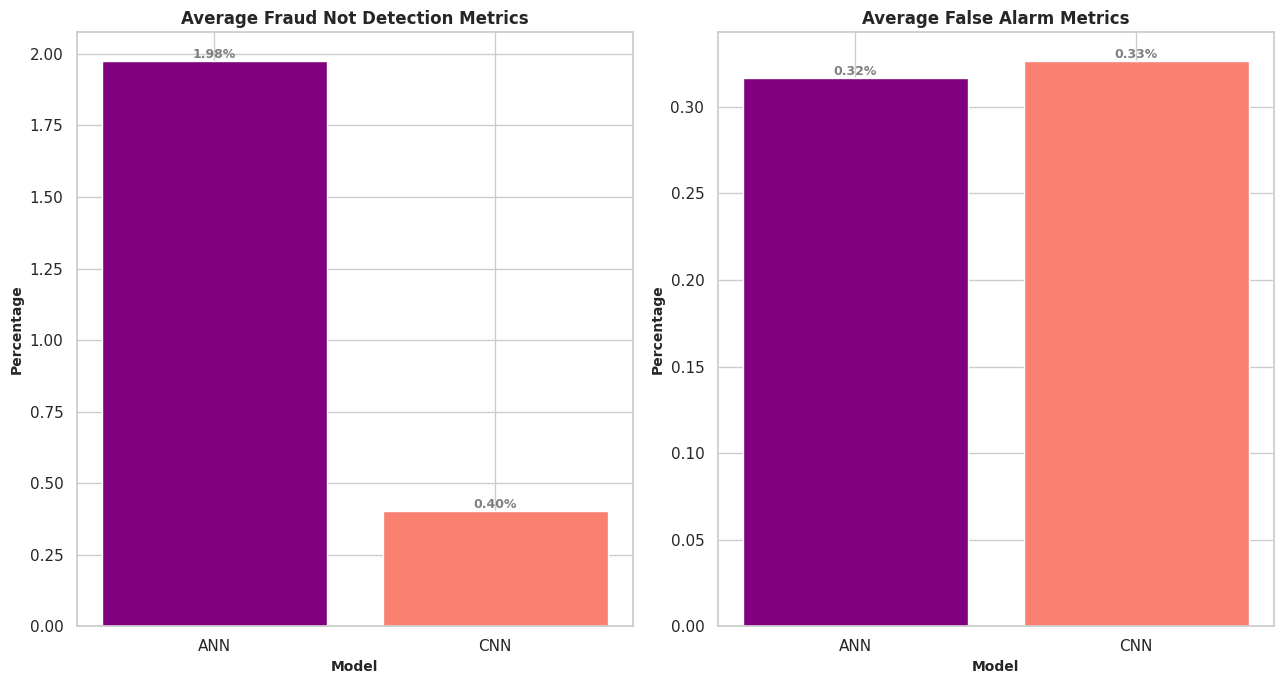

In [49]:
ann_fn_detect = metrics_df[('ANN', 'FraudNotDetected')]
ann_false_alarm = metrics_df[('ANN', 'FalseAlarm')]
cnn_fn_detect = metrics_df[('CNN', 'FraudNotDetected')]
cnn_false_alarm = metrics_df[('CNN', 'FalseAlarm')]

color = ['purple', 'salmon']

fig, axs = plt.subplots(1, 2, figsize = (13, 7))

# Bar chart for Fraud Not Detected
bars_fn_detect = axs[0].bar(['ANN', 'CNN'],
                            [ann_fn_detect.mean(), cnn_fn_detect.mean()],
                            color = color)

# Add percentage labels on top of each bar
for bar, value in zip(bars_fn_detect, [ann_fn_detect.mean(), cnn_fn_detect.mean()]):
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}%', ha = 'center', va = 'bottom',
                fontsize = 9, fontweight = 'bold', color = 'grey')

axs[0].set_title('Average Fraud Not Detection Metrics', fontweight = 'bold', fontsize = 12)
axs[0].set_ylabel('Percentage', fontweight = 'bold', fontsize = 10)
axs[0].set_xlabel('Model', fontweight = 'bold', fontsize = 10)

# Bar chart for False Alarm
bars_false_alarm = axs[1].bar(['ANN', 'CNN'],
                              [ann_false_alarm.mean(), cnn_false_alarm.mean()],
                              color = color)
# Add percentage labels on top of each bar
for bar, value in zip(bars_false_alarm, [ann_false_alarm.mean(), cnn_false_alarm.mean()]):
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}%', ha = 'center', va = 'bottom',
                fontsize = 9, fontweight = 'bold', color = 'grey')

axs[1].set_title('Average False Alarm Metrics', fontweight = 'bold', fontsize = 12)
axs[1].set_ylabel('Percentage', fontweight = 'bold', fontsize = 10)
axs[1].set_xlabel('Model', fontweight = 'bold', fontsize = 10)

plt.tight_layout()
plt.show()

Inspecting the *average* **fraud** not detection metrics, we can infer that the best model at detecting fraud is the Convolutional Neural Network (**CNN**), presenting a percentage of **0.4%** significantly lower than the Artificial Neural Network model (1.98%).

On the other hand, examining the *average* **false alarm** metrics, we can show that the best model capturing fewer false alarms is the Artificial Neural Network (**ANN**), indicating a percentage of **0.32%**, lower than the Convolutional Neural Network model (0.33%).

Since the primary concern of our project is **maximizing** fraud *detection* and **minimizing** instances of fraud going *undetected*, we can conclude that our Convolutional Neural Network (**CNN**) appears to be the better model, indicating a higher *sensitivity* to detecting fraudulent transactions.

In [50]:
def calculate_metrics(conf_matrix):
    # Extract values from confusion matrix
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]
    tp = conf_matrix[1, 1]

    return tn, fp, fn, tp

# Initialize lists to store the results for each model
metrics_data_ann = []
metrics_data_cnn = []

# Assuming you have cm50_ann, cm80_ann, cm90_ann, cm50_cnn, cm80_cnn, cm90_cnn defined
for threshold, conf_matrix_ann, conf_matrix_cnn in zip(['50%', '80%', '90%'], [cm50, cm80, cm90], [cm50_cnn, cm80_cnn, cm90_cnn]):
    tn_ann, fp_ann, fn_ann, tp_ann = calculate_metrics(conf_matrix_ann)
    tn_cnn, fp_cnn, fn_cnn, tp_cnn = calculate_metrics(conf_matrix_cnn)

    # Calculate accuracy
    accuracy_ann = (tp_ann + tn_ann) / (tp_ann + tn_ann + fp_ann + fn_ann)
    accuracy_cnn = (tp_cnn + tn_cnn) / (tp_cnn + tn_cnn + fp_cnn + fn_cnn)

    metrics_data_ann.append({
        'Threshold': threshold,
        'TN': tn_ann,
        'FP': fp_ann,
        'FN': fn_ann,
        'TP': tp_ann,
        'Accuracy': accuracy_ann
    })

    metrics_data_cnn.append({
        'Threshold': threshold,
        'TN': tn_cnn,
        'FP': fp_cnn,
        'FN': fn_cnn,
        'TP': tp_cnn,
        'Accuracy': accuracy_cnn
    })

# Print or use metrics_data_ann and metrics_data_cnn as needed
print("Metrics for ANN:")
for metrics in metrics_data_ann:
    print(f"Threshold: {metrics['Threshold']}")
    print(f"True Negatives (TN): {metrics['TN']}")
    print(f"False Positives (FP): {metrics['FP']}")
    print(f"False Negatives (FN): {metrics['FN']}")
    print(f"True Positives (TP): {metrics['TP']}")
    print(f"Accuracy: {metrics['Accuracy']:.2%}")
    print()

print("\nMetrics for CNN:")
for metrics in metrics_data_cnn:
    print(f"Threshold: {metrics['Threshold']}")
    print(f"True Negatives (TN): {metrics['TN']}")
    print(f"False Positives (FP): {metrics['FP']}")
    print(f"False Negatives (FN): {metrics['FN']}")
    print(f"True Positives (TP): {metrics['TP']}")
    print(f"Accuracy: {metrics['Accuracy']:.2%}")
    print()


Metrics for ANN:
Threshold: 50%
True Negatives (TN): 56450
False Positives (FP): 300
False Negatives (FN): 203
True Positives (TP): 56773
Accuracy: 99.56%

Threshold: 80%
True Negatives (TN): 56609
False Positives (FP): 141
False Negatives (FN): 866
True Positives (TP): 56110
Accuracy: 99.11%

Threshold: 90%
True Negatives (TN): 56654
False Positives (FP): 96
False Negatives (FN): 2305
True Positives (TP): 54671
Accuracy: 97.89%


Metrics for CNN:
Threshold: 50%
True Negatives (TN): 56334
False Positives (FP): 416
False Negatives (FN): 0
True Positives (TP): 56976
Accuracy: 99.63%

Threshold: 80%
True Negatives (TN): 56659
False Positives (FP): 91
False Negatives (FN): 0
True Positives (TP): 56976
Accuracy: 99.92%

Threshold: 90%
True Negatives (TN): 56699
False Positives (FP): 51
False Negatives (FN): 690
True Positives (TP): 56286
Accuracy: 99.35%

